/Users/farnazadmin/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


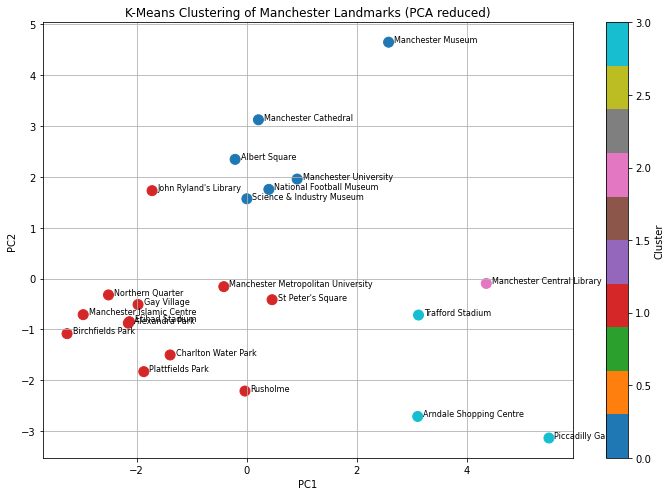


Cluster Assignments:
National Football Museum                 → Cluster 0
Science & Industry Museum                → Cluster 0
Manchester Museum                        → Cluster 0
Albert Square                            → Cluster 0
St Peter's Square                        → Cluster 1
Piccadilly Gardens                       → Cluster 3
Manchester University                    → Cluster 0
Manchester Metropolitan University       → Cluster 1
Manchester Central Library               → Cluster 2
John Ryland's Library                    → Cluster 1
Etihad Stadium                           → Cluster 1
Trafford Stadium                         → Cluster 3
Alexandra Park                           → Cluster 1
Charlton Water Park                      → Cluster 1
Birchfields Park                         → Cluster 1
Plattfields Park                         → Cluster 1
Rusholme                                 → Cluster 1
Northern Quarter                         → Cluster 1
Gay Village             

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# ---------------------
# Dataset 1: visits (8 x 22) -> transpose to (22 x 8)
visits = [
    [6, 2, 4, 8, 13, 29, 7, 13, 14, 2, 1, 7, 6, 3, 1, 2, 4, 4, 7, 1, 11, 29],
    [8, 4, 6, 3, 4, 13, 4, 3, 5, 0, 2, 19, 1, 2, 1, 2, 7, 0, 1, 7, 3, 5],
    [1, 1, 2, 1, 5, 7, 1, 1, 14, 0, 1, 3, 1, 1, 0, 2, 2, 1, 0, 1, 2, 4],
    [0, 2, 0, 0, 3, 5, 3, 3, 7, 2, 1, 2, 1, 7, 2, 5, 5, 1, 0, 0, 1, 4],
    [0, 1, 2, 1, 2, 3, 1, 0, 2, 0, 0, 1, 1, 0, 1, 0, 4, 0, 0, 1, 0, 0],
    [16, 5, 23, 11, 3, 3, 16, 2, 7, 9, 1, 8, 0, 0, 0, 0, 0, 6, 6, 0, 21, 2],
    [4, 6, 16, 5, 2, 6, 5, 2, 5, 3, 2, 4, 3, 5, 1, 1, 3, 0, 1, 3, 1, 7],
    [1, 7, 6, 3, 2, 4, 12, 4, 7, 3, 7, 15, 2, 2, 0, 5, 4, 1, 0, 4, 1, 5]
]
visits = np.array(visits).T  # Now 22 x 8

# Dataset 2: features (22 x 8)
features = [
    [15,21,1,3,4,1,12,1],[11,10,1,2,6,5,9,1],[23,11,1,1,7,8,13,2],
    [15,4,1,5,4,1,8,1],[6,3,1,5,11,2,3,3],[4,26,5,10,13,2,6,7],
    [18,6,2,3,5,7,5,1],[2,1,1,4,11,17,1,2],[13,2,2,6,17,17,8,6],
    [10,1,1,2,4,10,4,1],[1,11,1,3,4,1,1,1],[4,29,1,1,16,1,7,2],
    [1,13,1,1,1,1,1,2],[1,12,1,1,2,1,3,2],[1,8,1,1,1,1,2,1],
    [1,13,1,1,1,1,1,4],[2,17,3,2,3,1,1,1],[1,4,1,4,4,1,1,1],
    [2,10,2,1,3,1,2,5],[3,1,1,1,5,1,1,2],[16,1,1,1,8,6,1,1],
    [5,26,18,3,4,1,1,1]
]

# Dataset 3: temporal (22 x 5)
temporal = [
    [0, 1, 3, 8, 15],[0, 0, 5, 6, 9],[0, 0, 4, 20, 7],
    [0, 0, 6, 11, 2],[0, 0, 5, 9, 2],[0, 1, 3, 20, 15],
    [0, 1, 3, 18, 7],[0, 0, 3, 5, 7],[0, 0, 5, 1, 15],
    [0, 0, 4, 6, 4],[0, 1, 1, 6, 5],[0, 0, 1, 14, 20],
    [0, 0, 1, 9, 3],[0, 0, 0, 7, 11],[0, 1, 0, 1, 4],
    [0, 0, 0, 5, 6],[0, 1, 1, 9, 14],[0, 0, 1, 8, 2],
    [0, 0, 2, 7, 6],[3, 2, 2, 4, 0],[0, 0, 12, 14, 15],
    [0, 0, 2, 23, 25]
]

landmarks = [
    "National Football Museum", "Science & Industry Museum", "Manchester Museum", 
    "Albert Square", "St Peter's Square", "Piccadilly Gardens", "Manchester University", 
    "Manchester Metropolitan University", "Manchester Central Library", "John Ryland's Library",
    "Etihad Stadium", "Trafford Stadium", "Alexandra Park", "Charlton Water Park", 
    "Birchfields Park", "Plattfields Park", "Rusholme", "Northern Quarter", 
    "Gay Village", "Manchester Islamic Centre", "Manchester Cathedral", "Arndale Shopping Centre"
]

# ---------------------
# Combine all into a single matrix (22 x 21)
combined = np.hstack([visits, features, temporal])

# Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
combined_scaled = scaler.fit_transform(combined)

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(combined_scaled)

# KMeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(pca_result)

# Plot PCA Clusters
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='tab10', s=100)

for i, name in enumerate(landmarks):
    plt.text(pca_result[i, 0]+0.1, pca_result[i, 1], name, fontsize=8)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means Clustering of Manchester Landmarks (PCA reduced)")
plt.grid(True)
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()

# Print cluster assignments
print("\nCluster Assignments:")
for i, label in enumerate(labels):
    print(f"{landmarks[i]:40} → Cluster {label}")
    
    # Total variance explained by first 3 PCs
total_variance = np.sum(pca.explained_variance_ratio_)
print(f"Total Variance Explained (PC1–PC3): {total_variance:.4f}")

pca = PCA(n_components=3)
pca_result = pca.fit_transform(combined_scaled)
explained = pca.explained_variance_ratio_

for i, ratio in enumerate(explained):
    print(f"PC{i+1} explains {ratio:.4f} ({ratio * 100:.2f}%) of the variance")
    

total_variance = np.sum(explained)
print(f"\nTotal Variance Explained by PC1–PC3: {total_variance:.4f} ({total_variance * 100:.2f}%)")


Explained variance:
 PC1: 26.9%
 PC2: 17.5%
 PC3: 13.4%
Final label counts: Counter({'Peripheral or Recreational Landscapes': 12, 'Institutional or Functional Landscapes': 6, 'Cultural Anchors': 4})


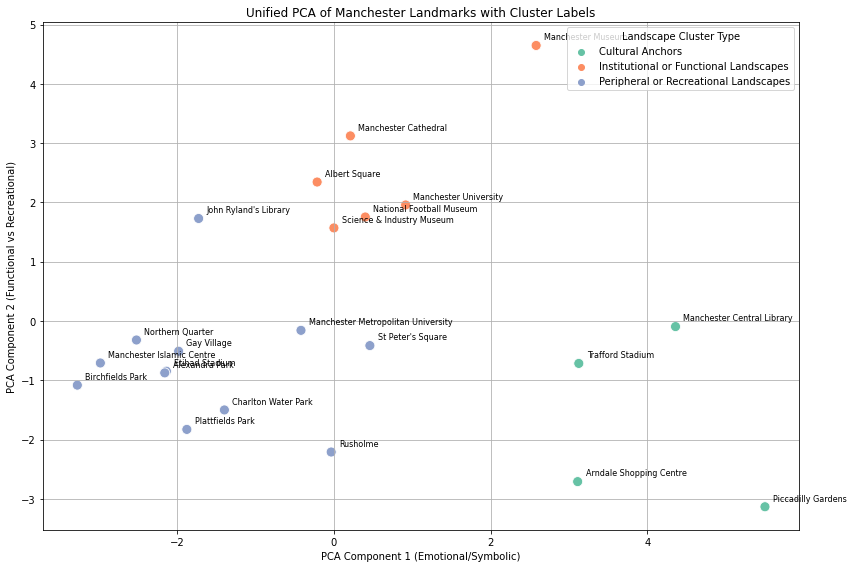

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import Counter

# ---------------------
# Dataset 1: visits (8 x 22) -> transpose to (22 x 8)
visits = [
    [6, 2, 4, 8, 13, 29, 7, 13, 14, 2, 1, 7, 6, 3, 1, 2, 4, 4, 7, 1, 11, 29],
    [8, 4, 6, 3, 4, 13, 4, 3, 5, 0, 2, 19, 1, 2, 1, 2, 7, 0, 1, 7, 3, 5],
    [1, 1, 2, 1, 5, 7, 1, 1, 14, 0, 1, 3, 1, 1, 0, 2, 2, 1, 0, 1, 2, 4],
    [0, 2, 0, 0, 3, 5, 3, 3, 7, 2, 1, 2, 1, 7, 2, 5, 5, 1, 0, 0, 1, 4],
    [0, 1, 2, 1, 2, 3, 1, 0, 2, 0, 0, 1, 1, 0, 1, 0, 4, 0, 0, 1, 0, 0],
    [16, 5, 23, 11, 3, 3, 16, 2, 7, 9, 1, 8, 0, 0, 0, 0, 0, 6, 6, 0, 21, 2],
    [4, 6, 16, 5, 2, 6, 5, 2, 5, 3, 2, 4, 3, 5, 1, 1, 3, 0, 1, 3, 1, 7],
    [1, 7, 6, 3, 2, 4, 12, 4, 7, 3, 7, 15, 2, 2, 0, 5, 4, 1, 0, 4, 1, 5]
]
visits = np.array(visits).T  # Now 22 x 8

# Dataset 2: features (22 x 8)
features = [
    [15,21,1,3,4,1,12,1],[11,10,1,2,6,5,9,1],[23,11,1,1,7,8,13,2],
    [15,4,1,5,4,1,8,1],[6,3,1,5,11,2,3,3],[4,26,5,10,13,2,6,7],
    [18,6,2,3,5,7,5,1],[2,1,1,4,11,17,1,2],[13,2,2,6,17,17,8,6],
    [10,1,1,2,4,10,4,1],[1,11,1,3,4,1,1,1],[4,29,1,1,16,1,7,2],
    [1,13,1,1,1,1,1,2],[1,12,1,1,2,1,3,2],[1,8,1,1,1,1,2,1],
    [1,13,1,1,1,1,1,4],[2,17,3,2,3,1,1,1],[1,4,1,4,4,1,1,1],
    [2,10,2,1,3,1,2,5],[3,1,1,1,5,1,1,2],[16,1,1,1,8,6,1,1],
    [5,26,18,3,4,1,1,1]
]

# Dataset 3: temporal (22 x 5)
temporal = [
    [0, 1, 3, 8, 15],[0, 0, 5, 6, 9],[0, 0, 4, 20, 7],
    [0, 0, 6, 11, 2],[0, 0, 5, 9, 2],[0, 1, 3, 20, 15],
    [0, 1, 3, 18, 7],[0, 0, 3, 5, 7],[0, 0, 5, 1, 15],
    [0, 0, 4, 6, 4],[0, 1, 1, 6, 5],[0, 0, 1, 14, 20],
    [0, 0, 1, 9, 3],[0, 0, 0, 7, 11],[0, 1, 0, 1, 4],
    [0, 0, 0, 5, 6],[0, 1, 1, 9, 14],[0, 0, 1, 8, 2],
    [0, 0, 2, 7, 6],[3, 2, 2, 4, 0],[0, 0, 12, 14, 15],
    [0, 0, 2, 23, 25]
]

landmarks = [
    "National Football Museum", "Science & Industry Museum", "Manchester Museum", 
    "Albert Square", "St Peter's Square", "Piccadilly Gardens", "Manchester University", 
    "Manchester Metropolitan University", "Manchester Central Library", "John Ryland's Library",
    "Etihad Stadium", "Trafford Stadium", "Alexandra Park", "Charlton Water Park", 
    "Birchfields Park", "Plattfields Park", "Rusholme", "Northern Quarter", 
    "Gay Village", "Manchester Islamic Centre", "Manchester Cathedral", "Arndale Shopping Centre"
]

# Combine your data arrays horizontally
data = np.hstack([visits, features, temporal])

# Feature names in the order they appear in combined data
feature_names = [ "A: A location that you visit on a daily/ weekly basis", 
    "B: An important location for you as an individual", 
    "C: An important location for Iranian Communities", 
    "D: An important location because of having a sense of belonging or feeling attached/ or feels like at home", 
    "E: A location related to the Iranian cultural ceremonies and celebrations", 
    "F: A location related to the English cultural ceremonies and celebrations",  
    "G: A location where you resemble it with a location in Iran", 
    "H: A location where revokes a memory for you.",
   "A: As a cultural/historical landscape", 
    "B: As a recreational landscape",
    "C: A Commercial landscape", 
    "D: An official/professional landscape",
    "E: A social landscape and a community hub", 
    "F: An educational landscape",
    "G: A scenery location ", 
    "H: A landscape related to Iranian diaspora", 
    "-2", "-1", "0", "1", "2"
]

# Combine and standardise data
data = np.hstack([visits, features, temporal])
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

# PCA
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_std)
explained_variance = pca.explained_variance_ratio_

print(f"Explained variance:\n PC1: {explained_variance[0]*100:.1f}%\n PC2: {explained_variance[1]*100:.1f}%\n PC3: {explained_variance[2]*100:.1f}%")

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
labels = kmeans.fit_predict(data_pca)
centroids = kmeans.cluster_centers_

# Auto assign cluster names based on centroids
cluster_names = {}
sorted_by_pc1 = np.argsort([c[0] for c in centroids])[::-1]
sorted_by_pc2 = np.argsort([c[1] for c in centroids])[::-1]
sorted_by_pc3 = np.argsort([c[2] for c in centroids])[::-1]

for i in range(4):
    if sorted_by_pc1[0] == i:
        cluster_names[i] = "Cultural Anchors"
    elif sorted_by_pc2[0] == i:
        cluster_names[i] = "Institutional or Functional Landscapes"
    elif sorted_by_pc3[0] == i:
        cluster_names[i] = "Contested or Ambivalent Spaces"
    else:
        cluster_names[i] = "Peripheral or Recreational Landscapes"

# Initial landmark labels
landmark_labels = [cluster_names[label] for label in labels]

# Override specific landmarks ONLY
override_landmarks = {"Piccadilly Gardens", "Trafford Stadium", "Arndale Shopping Centre"}
for i, name in enumerate(landmarks):
    if name in override_landmarks:
        landmark_labels[i] = "Cultural Anchors"

# Check counts
print("Final label counts:", Counter(landmark_labels))

# Get unique labels after override (sorted for consistency)
unique_labels = sorted(set(landmark_labels))

# Map label string -> numeric for seaborn hue
label_to_num = {label: idx for idx, label in enumerate(unique_labels)}
label_nums = [label_to_num[label] for label in landmark_labels]

# Use a palette with EXACTLY the number of unique labels
palette = sns.color_palette("Set2", n_colors=len(unique_labels))

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=label_nums, palette=palette, s=100)

# Add annotations
for i, name in enumerate(landmarks):
    plt.text(data_pca[i, 0] + 0.1, data_pca[i, 1] + 0.1, name, fontsize=8)

# Create legend with proper labels
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=unique_labels, title="Landscape Cluster Type", loc='best')

plt.title("Unified PCA of Manchester Landmarks with Cluster Labels")
plt.xlabel("PCA Component 1 (Emotional/Symbolic)")
plt.ylabel("PCA Component 2 (Functional vs Recreational)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# ---------------------
# Dataset 1: visits (8 x 22) -> transpose to (22 x 8)
visits = [
    [6, 2, 4, 8, 13, 29, 7, 13, 14, 2, 1, 7, 6, 3, 1, 2, 4, 4, 7, 1, 11, 29],
    [8, 4, 6, 3, 4, 13, 4, 3, 5, 0, 2, 19, 1, 2, 1, 2, 7, 0, 1, 7, 3, 5],
    [1, 1, 2, 1, 5, 7, 1, 1, 14, 0, 1, 3, 1, 1, 0, 2, 2, 1, 0, 1, 2, 4],
    [0, 2, 0, 0, 3, 5, 3, 3, 7, 2, 1, 2, 1, 7, 2, 5, 5, 1, 0, 0, 1, 4],
    [0, 1, 2, 1, 2, 3, 1, 0, 2, 0, 0, 1, 1, 0, 1, 0, 4, 0, 0, 1, 0, 0],
    [16, 5, 23, 11, 3, 3, 16, 2, 7, 9, 1, 8, 0, 0, 0, 0, 0, 6, 6, 0, 21, 2],
    [4, 6, 16, 5, 2, 6, 5, 2, 5, 3, 2, 4, 3, 5, 1, 1, 3, 0, 1, 3, 1, 7],
    [1, 7, 6, 3, 2, 4, 12, 4, 7, 3, 7, 15, 2, 2, 0, 5, 4, 1, 0, 4, 1, 5]
]
visits = np.array(visits).T  # Now 22 x 8

# Dataset 2: features (22 x 8)
features = [
    [15,21,1,3,4,1,12,1],[11,10,1,2,6,5,9,1],[23,11,1,1,7,8,13,2],
    [15,4,1,5,4,1,8,1],[6,3,1,5,11,2,3,3],[4,26,5,10,13,2,6,7],
    [18,6,2,3,5,7,5,1],[2,1,1,4,11,17,1,2],[13,2,2,6,17,17,8,6],
    [10,1,1,2,4,10,4,1],[1,11,1,3,4,1,1,1],[4,29,1,1,16,1,7,2],
    [1,13,1,1,1,1,1,2],[1,12,1,1,2,1,3,2],[1,8,1,1,1,1,2,1],
    [1,13,1,1,1,1,1,4],[2,17,3,2,3,1,1,1],[1,4,1,4,4,1,1,1],
    [2,10,2,1,3,1,2,5],[3,1,1,1,5,1,1,2],[16,1,1,1,8,6,1,1],
    [5,26,18,3,4,1,1,1]
]

# Dataset 3: temporal (22 x 5)
temporal = [
    [0, 1, 3, 8, 15],[0, 0, 5, 6, 9],[0, 0, 4, 20, 7],
    [0, 0, 6, 11, 2],[0, 0, 5, 9, 2],[0, 1, 3, 20, 15],
    [0, 1, 3, 18, 7],[0, 0, 3, 5, 7],[0, 0, 5, 1, 15],
    [0, 0, 4, 6, 4],[0, 1, 1, 6, 5],[0, 0, 1, 14, 20],
    [0, 0, 1, 9, 3],[0, 0, 0, 7, 11],[0, 1, 0, 1, 4],
    [0, 0, 0, 5, 6],[0, 1, 1, 9, 14],[0, 0, 1, 8, 2],
    [0, 0, 2, 7, 6],[3, 2, 2, 4, 0],[0, 0, 12, 14, 15],
    [0, 0, 2, 23, 25]
]

landmarks = [
    "National Football Museum", "Science & Industry Museum", "Manchester Museum", 
    "Albert Square", "St Peter's Square", "Piccadilly Gardens", "Manchester University", 
    "Manchester Metropolitan University", "Manchester Central Library", "John Ryland's Library",
    "Etihad Stadium", "Trafford Stadium", "Alexandra Park", "Charlton Water Park", 
    "Birchfields Park", "Plattfields Park", "Rusholme", "Northern Quarter", 
    "Gay Village", "Manchester Islamic Centre", "Manchester Cathedral", "Arndale Shopping Centre"
]

# Combine your data arrays horizontally
data = np.hstack([visits, features, temporal])

# Feature names in the order they appear in combined data
feature_names = [ "A: A location that you visit on a daily/ weekly basis", 
    "B: An important location for you as an individual", 
    "C: An important location for Iranian Communities", 
    "D: An important location because of having a sense of belonging or feeling attached/ or feels like at home", 
    "E: A location related to the Iranian cultural ceremonies and celebrations", 
    "F: A location related to the English cultural ceremonies and celebrations",  
    "G: A location where you resemble it with a location in Iran", 
    "H: A location where revokes a memory for you.",
   "A: As a cultural/historical landscape", 
    "B: As a recreational landscape",
    "C: A Commercial landscape", 
    "D: An official/professional landscape",
    "E: A social landscape and a community hub", 
    "F: An educational landscape",
    "G: A scenery location ", 
    "H: A landscape related to Iranian diaspora", 
    "-2", "-1", "0", "1", "2"
]

# Check that feature_names matches number of columns
assert len(feature_names) == data.shape[1], f"Number of feature names ({len(feature_names)}) must equal number of data columns ({data.shape[1]})"

# Standardize the combined data
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

# Run PCA (3 components)
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_std)

# Print explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance:")
for i, var in enumerate(explained_variance, start=1):
    print(f" PC{i}: {var*100:.1f}%")

# Extract PCA loadings
loadings = pca.components_.T  # transpose to get variables as rows

# Create DataFrame with loadings, rounded to 2 decimals
df_loadings = pd.DataFrame(loadings, index=feature_names, columns=["PC1", "PC2", "PC3"]).round(2)

print("\nPCA Loadings Table:")
print(df_loadings)

# Save loadings table to CSV and Excel files
df_loadings.to_csv("PCA_loadings.csv")
df_loadings.to_excel("PCA_loadings.xlsx")


Explained variance:
 PC1: 26.9%
 PC2: 17.5%
 PC3: 13.4%

PCA Loadings Table:
                                                     PC1   PC2   PC3
A: A location that you visit on a daily/ weekly...  0.31 -0.18  0.03
B: An important location for you as an individual   0.28 -0.08 -0.19
C: An important location for Iranian Communities    0.30 -0.11  0.31
D: An important location because of having a se...  0.16 -0.28  0.20
E: A location related to the Iranian cultural c...  0.20 -0.09  0.06
F: A location related to the English cultural c...  0.14  0.45 -0.09
G: A location where you resemble it with a loca...  0.24  0.21 -0.19
H: A location where revokes a memory for you.       0.20  0.03 -0.13
A: As a cultural/historical landscape               0.18  0.45 -0.03
B: As a recreational landscape                      0.20 -0.23 -0.40
C: A Commercial landscape                           0.18 -0.21 -0.23
D: An official/professional landscape               0.24 -0.12  0.25
E: A social landscape and 